In [1]:
!pip install -q torch_snippets
from torch_snippets import *
!wget https://www.dropbox.com/s/mfg1codtc2rue84/g1.png
!wget https://www.dropbox.com/s/4yhui8s1xjndavm/g2.png

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.4/65.4 kB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 8.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.7/203.7 kB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 58.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 61.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.9/98.9 kB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 33.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.6/30.6 MB 15.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.4/169.4 kB 17.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 82.3 MB/s eta 0:

--2023-10-24 02:48:06--  https://www.dropbox.com/s/mfg1codtc2rue84/g1.png
Resolving www.dropbox.com (www.dropbox.com)... 162.125.80.18, 2620:100:6035:18::a27d:5512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.80.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/mfg1codtc2rue84/g1.png [following]
--2023-10-24 02:48:07--  https://www.dropbox.com/s/raw/mfg1codtc2rue84/g1.png
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc7ce3facb551587120417090d7e.dl.dropboxusercontent.com/cd/0/inline/CGKmJWPvhhFlLU-qQ-WXCOe1LUpTHB2AtngTp_xkOhi3q4WXf0S6JpbmVBDRndnqDlHrNNzbu_MAqyoR6qjP15-jzAZR7PRlfvmPzbGs_N6BGa9fKzpAe_U7aw2HiUjJkbJP_QxekJOb_YjLgiumqY18/file# [following]
--2023-10-24 02:48:08--  https://uc7ce3facb551587120417090d7e.dl.dropboxusercontent.com/cd/0/inline/CGKmJWPvhhFlLU-qQ-WXCOe1LUpTHB2AtngTp_xkOhi3q4WXf0S6JpbmVBDRndnqDlHrNNzbu_MAqyoR6qjP15-jzAZR7PRlfvmPzbGs_N6BGa9fKzpAe

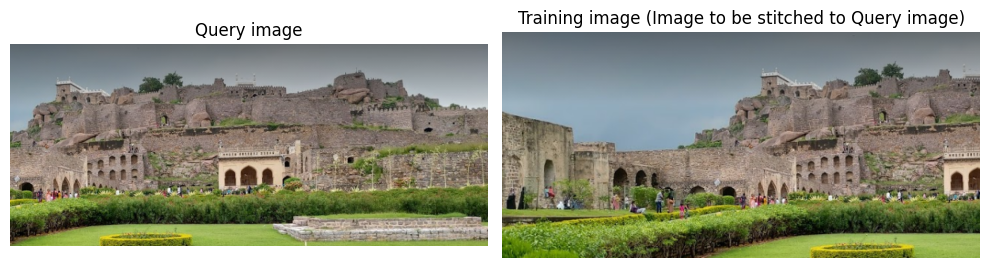

In [2]:
queryImg = read('g1.png', 1)
queryImg_gray = read('g1.png')

trainImg = read('g2.png', 1)
trainImg_gray = read('g2.png')

subplots([trainImg, queryImg], nc=2, figsize=(10,5), titles = ['Query image', 'Training image (Image to be stitched to Query image)'])

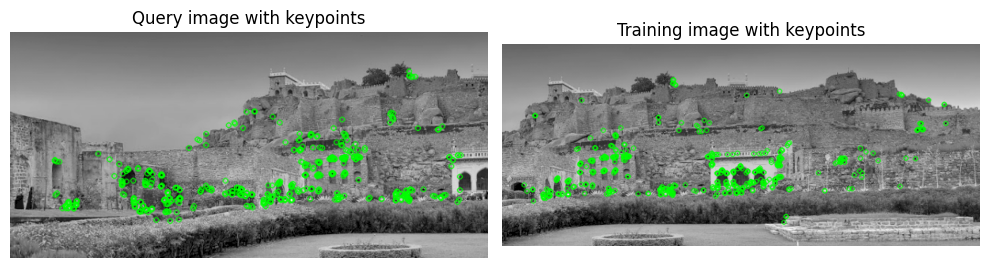

In [3]:
# Fetch the keypoints and features corresponding to the images
descriptor = cv2.ORB_create()
kpsA, featuresA = descriptor.detectAndCompute(trainImg_gray, None)
kpsB, featuresB = descriptor.detectAndCompute(queryImg_gray, None)

# Draw the keypoints obtained on images
img_kpsA = cv2.drawKeypoints(trainImg_gray, kpsA, None, color=(0, 255, 0))
img_kpsB = cv2.drawKeypoints(queryImg_gray,kpsB,None, color=(0,255,0))

subplots([img_kpsB, img_kpsA], nc=2, figsize=(10,5),
         titles=['Query image with keypoints', 'Training image with keypoints'])

In [4]:
bf = cv2.BFMatcher(cv2.NORM_HAMMING)
best_matches = bf.match(featuresA,featuresB)
matches = sorted(best_matches, key = lambda x:x.distance)

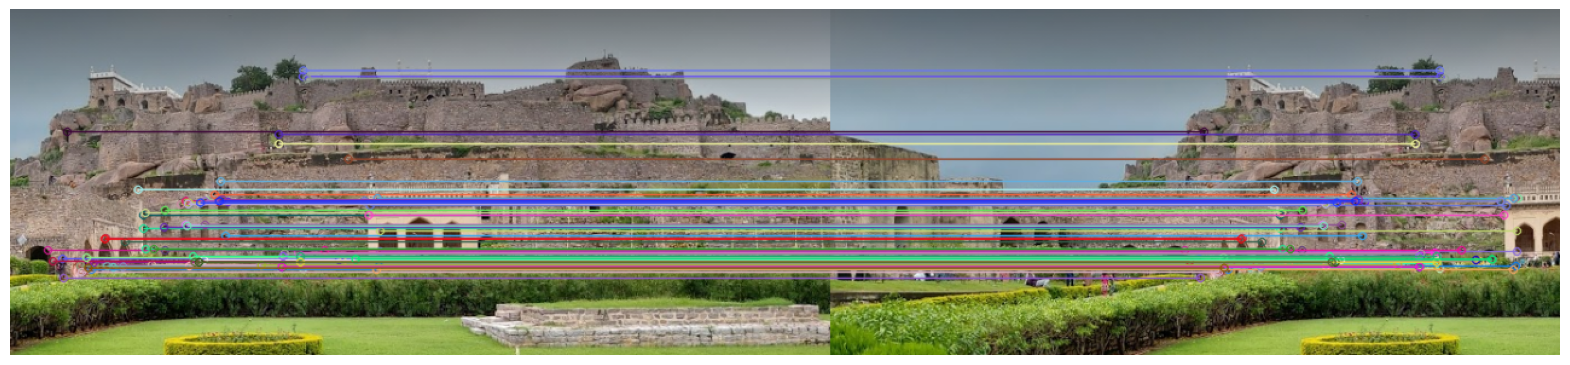

In [5]:
img3 = cv2.drawMatches(trainImg,kpsA,queryImg,kpsB, matches[:100],None,
                       flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
show(img3)

In [6]:
kpsA = np.float32([kp.pt for kp in kpsA])
kpsB = np.float32([kp.pt for kp in kpsB])
ptsA = np.float32([kpsA[m.queryIdx] for m in matches])
ptsB = np.float32([kpsB[m.trainIdx] for m in matches])
(H, status) = cv2.findHomography(ptsA, ptsB, cv2.RANSAC,4)

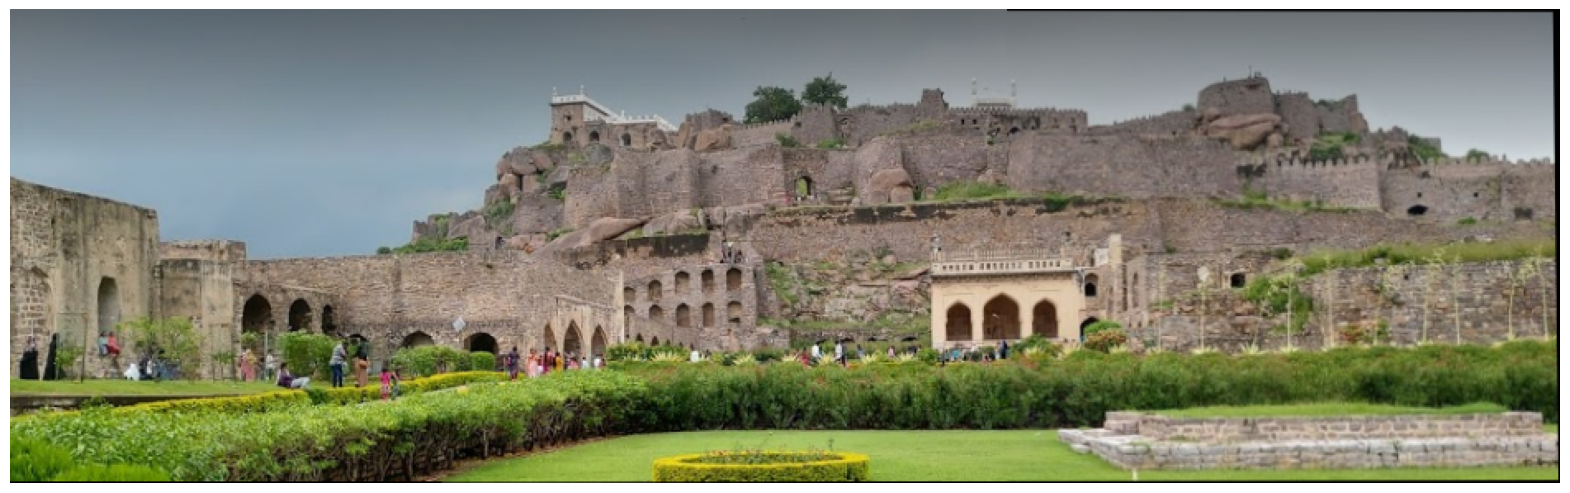

In [7]:
width = trainImg.shape[1] + queryImg.shape[1]
height = trainImg.shape[0] + queryImg.shape[0]
result = cv2.warpPerspective(trainImg, H, (width, height))
result[0:queryImg.shape[0], 0:queryImg.shape[1]] = queryImg
_x = np.nonzero(result.sum(0).sum(-1) == 0)[0][0]
_y = np.nonzero(result.sum(1).sum(-1) == 0)[0][0]
show(result[:_y,:_x])

---